In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("premTransfersWinter21.csv")
df.head()

,Unnamed: 0,team_name,league,country,season,transfer_type,player_name,player_url,player_position,player_age,...,league_2,country_2,transfer_fee,is_loan,transfer_notes,window,in_squad,appearances,goals,minutes_played
0,1,Manchester City,Premier League,England,2021,Arrivals,Julián Álvarez,https://www.transfermarkt.com/julian-alvarez/p...,Centre-Forward,22,...,Liga Profesional,Argentina,17000000.0,False,NaN,Winter,NaN,NaN,NaN,NaN
1,2,Manchester City,Premier League,England,2021,Arrivals,Philippe Sandler,https://www.transfermarkt.com/philippe-sandler...,Centre-Back,24,...,Ligue 1,France,NaN,True,"End of loan Jan 25, 2022",Winter,1.0,0.0,0.0,0.0
2,3,Manchester City,Premier League,England,2021,Arrivals,Patrick Roberts,https://www.transfermarkt.com/patrick-roberts/...,Right Winger,24,...,Ligue 1,France,NaN,True,"End of loan Jan 20, 2022",Winter,NaN,NaN,NaN,NaN
3,4,Manchester City,Premier League,England,2021,Arrivals,Luka Ilic,https://www.transfermarkt.com/luka-ilic/profil...,Attacking Midfield,22,...,Eredivisie,Netherlands,NaN,True,"End of loan Jan 1, 2022",Winter,NaN,NaN,NaN,NaN
4,5,Manchester City,Premier League,England,2021,Departures,Ferran Torres,https://www.transfermarkt.com/ferran-torres/pr...,Right Winger,21,...,LaLiga,Spain,55000000.0,False,NaN,Winter,11.0,7.0,3.0,522.0


In [3]:
df = df.drop(columns=['player_url','transfer_notes','in_squad','goals','minutes_played'])
df = df.drop(columns=['player_position','player_age','player_nationality','season','country','league','league_2','window','appearances'])

In [4]:
teams = df.team_name.unique()
teams

array(['Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Manchester United', 'Tottenham Hotspur', 'Leicester City',
       'Arsenal FC', 'Everton FC', 'Aston Villa', 'West Ham United',
       'Wolverhampton Wanderers', 'Newcastle United', 'Leeds United',
       'Southampton FC', 'Crystal Palace', 'Brighton & Hove Albion',
       'Brentford FC', 'Norwich City', 'Watford FC', 'Burnley FC'],
      dtype=object)

In [5]:
len(teams)

20

In [6]:
dfmanc = df.loc[df['team_name']=='Manchester City']
dfmanc

,Unnamed: 0,team_name,transfer_type,player_name,club_2,country_2,transfer_fee,is_loan
0,1,Manchester City,Arrivals,Julián Álvarez,River Plate,Argentina,17000000.0,False
1,2,Manchester City,Arrivals,Philippe Sandler,Troyes,France,NaN,True
2,3,Manchester City,Arrivals,Patrick Roberts,Troyes,France,NaN,True
3,4,Manchester City,Arrivals,Luka Ilic,Twente FC,Netherlands,NaN,True
4,5,Manchester City,Departures,Ferran Torres,Barcelona,Spain,55000000.0,False
5,6,Manchester City,Departures,Philippe Sandler,Feyenoord,Netherlands,0.0,False
6,7,Manchester City,Departures,Patrick Roberts,Sunderland,England,0.0,False
7,8,Manchester City,Departures,Luka Ilic,Troyes,France,NaN,False
8,9,Manchester City,Departures,Julián Álvarez,River Plate,Argentina,NaN,True


In [7]:
# for index, row in dfmanc.iterrows():
#     if row['transfer_fee'] == 'NaN':
#         dfmanc[row]['transfer_fee'] = '0'
# #         print(dfmanc[index]['transfer_fee'])
dfmanc = dfmanc.dropna()
dfmanc

,Unnamed: 0,team_name,transfer_type,player_name,club_2,country_2,transfer_fee,is_loan
0,1,Manchester City,Arrivals,Julián Álvarez,River Plate,Argentina,17000000.0,False
4,5,Manchester City,Departures,Ferran Torres,Barcelona,Spain,55000000.0,False
5,6,Manchester City,Departures,Philippe Sandler,Feyenoord,Netherlands,0.0,False
6,7,Manchester City,Departures,Patrick Roberts,Sunderland,England,0.0,False


In [8]:
mancArrivals = []
mancArrivalsNm = []
for index, row in dfmanc.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0:
        mancArrivals.append(row['transfer_fee'])
        mancArrivalsNm.append(row['player_name'])


In [9]:
mancArrivals

[17000000.0]

In [10]:
mancDept = []
mancDeptNm = []
for index, row in dfmanc.iterrows():
    if row['transfer_type'] == 'Departures' and row['transfer_fee'] > 0:
        mancDept.append(row['transfer_fee'])
        mancDeptNm.append(row['player_name'])
mancDept

[55000000.0]

38000000.0


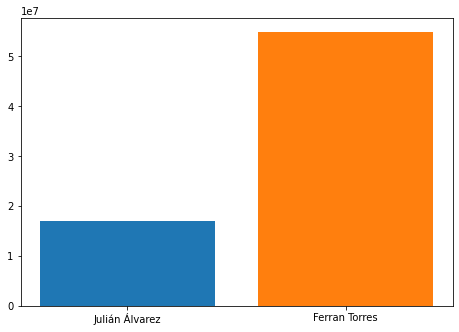

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mancArrivalsNm,mancArrivals)
ax.bar(mancDeptNm,mancDept)
mancDeptsum = sum(mancDept)
mancArrsum = sum(mancArrivals)
mancNet = mancDeptsum - mancArrsum 
print(mancNet)
plt.show()

In [12]:
arrivals = []
arrnames = []
arrteam = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0:
        arrivals.append(row['transfer_fee'])
        arrnames.append(row['player_name'])
        arrteam.append(row['team_name'])


In [13]:
dept = []
deptnames = []
deptteam = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Departures' and row['transfer_fee'] > 0:
        dept.append(row['transfer_fee'])
        deptnames.append(row['player_name'])
        deptteam.append(row['team_name'])


In [14]:
deptteam

['Manchester City',
 'Manchester United',
 'Tottenham Hotspur',
 'Arsenal FC',
 'Everton FC',
 'West Ham United',
 'Brighton & Hove Albion',
 'Burnley FC']

In [15]:
teamlabels = arrteam + deptteam
deptlabel = list(set(arrteam) - set(deptteam))
# deptlabel

In [16]:
import numpy as np
from matplotlib.pyplot import figure

<Figure size 432x288 with 0 Axes>

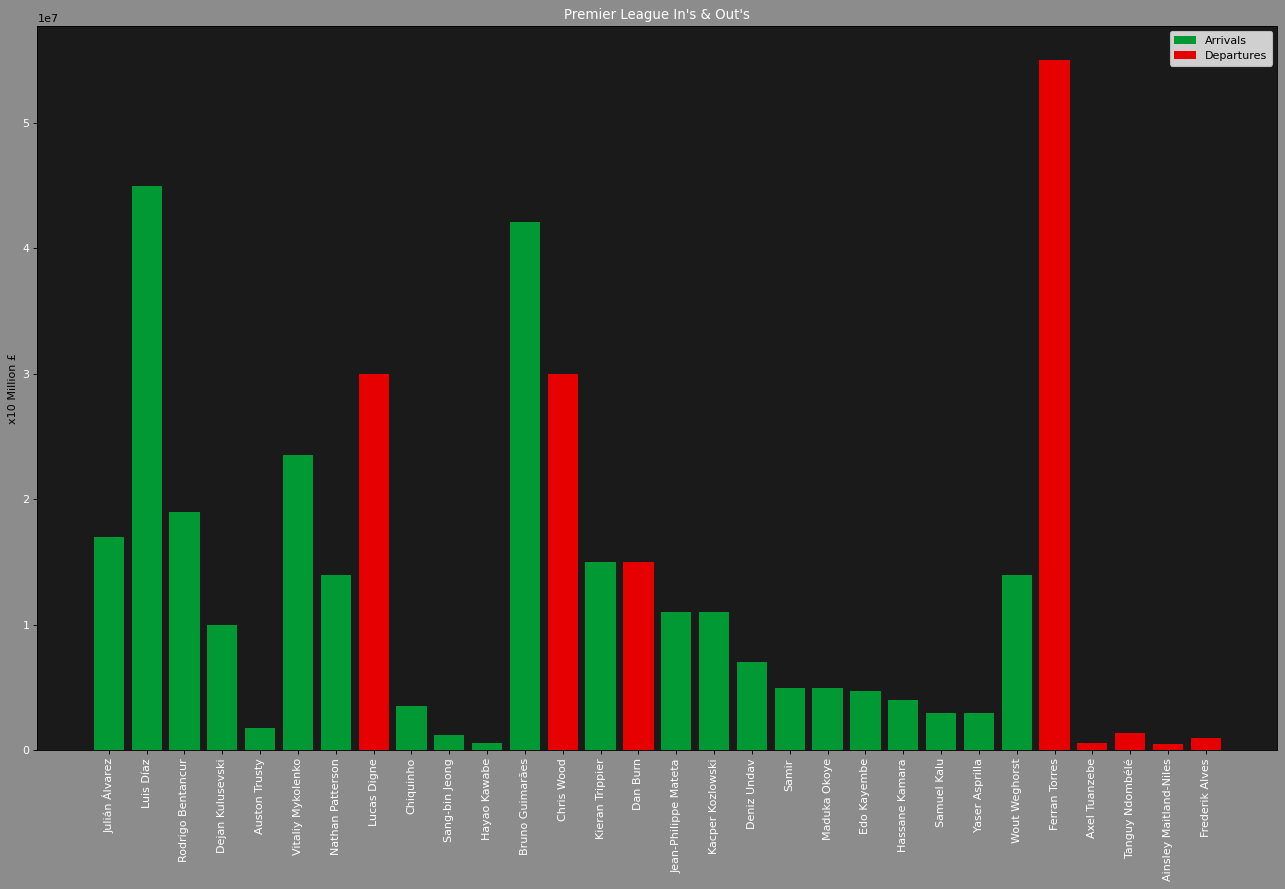

In [17]:
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
figure(figsize=(20, 12), dpi=80,facecolor='#8c8c8c')

ax = plt.axes()
ax.set_facecolor('#1a1a1a')

plt.xticks(rotation=90,color='white')
plt.yticks(color='white')
# ax = plt.subplots()

p1 = plt.bar(arrnames,arrivals,color='#009933',label='Arrivals')

p2 = plt.bar(deptnames,dept,color="#e60000",label='Departures')

# p3 = p1+p2
# plt.bar_label(p4,topspnfmt,color="white")

plt.title("Premier League In's & Out's",color='white')
# ax.set_title("Premier League In's & Out's")

# plt.bar_label(p1,teamlabels,padding=0,rotation=90)
# plt.bar_label(p1,teamlabels,rotation=90)
# plt.bar_label(p2,teamlabels,rotation=90)
plt.ylabel('x10 Million £')
plt.legend()



In [18]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

most_frequent(arrteam)
most_frequent(deptteam)


'Manchester City'

In [55]:
arrteam.count('Newcastle United')
# deptteam.count('Arsenal FC')
arrteam.count('Watford FC')
# arrteam.count('Burnley FC')

6

In [20]:
newcastS = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0 and row['team_name'] == 'Newcastle United':
        newcastS.append(row['transfer_fee'])

In [21]:
topspend = []
topspend.append(sum(newcastS))

In [22]:
liverpool = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0 and row['team_name'] == 'Liverpool FC':
        liverpool.append(row['transfer_fee'])
        

In [23]:
topspend.append(sum(liverpool))

In [24]:
manc = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0 and row['team_name'] == 'Manchester City':
        manc.append(row['transfer_fee'])

In [25]:
topspend.append(sum(manc))

In [26]:
topspend

[102100000.0, 45000000.0, 17000000.0]

In [27]:
watf = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0 and row['team_name'] == 'Watford FC':
        watf.append(row['transfer_fee'])

In [28]:
topspend.append(sum(watf))

In [29]:
spurs = []
for index, row in df.iterrows():
    if row['transfer_type'] == 'Arrivals' and row['transfer_fee'] > 0 and row['team_name'] == 'Tottenham Hotspur':
        spurs.append(row['transfer_fee'])

In [30]:
topspend.append(sum(spurs))

In [31]:
topspend
topspendnames = ['NUFC',  'Livpool', 'Manc City', 'Watford','spurs']

In [32]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

In [33]:
topspnfmt = []
# for i in range(topspend):
#     topspnfmt.append(human_format(topspend[i]))
topspnfmt.append(human_format(topspend[0]))
topspnfmt.append(human_format(topspend[1]))
topspnfmt.append(human_format(topspend[2]))
topspnfmt.append(human_format(topspend[3]))
topspnfmt.append(human_format(topspend[4]))
topspnfmt

['102.10M', '45.00M', '17.00M', '24.70M', '29.00M']

AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

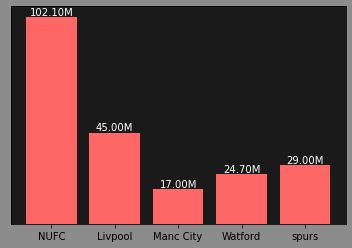

In [34]:
# drwng.set_facecolor('black')
plt.figure(facecolor='#8c8c8c')
ax = plt.axes()
ax.set_facecolor('#1a1a1a')

p4 = plt.bar(topspendnames,topspend,color='#ff6666')

ax.get_yaxis().set_visible(False)

# plt.facecolor('grey')
plt.bar_label(p4,topspnfmt,color="white")
plt.yaxis('off')

In [38]:
totalarrivals = sum(arrivals)
human_format(totalarrivals)

'335.42M'

In [40]:
totaldept = sum(dept)
human_format(totaldept)

'133.52M'

In [43]:
totalNet = totalarrivals - totaldept
human_format(totalNet)

'201.90M'

In [53]:
deptteam.count('Manchester City')

1